In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/Udemy/TensorFlow/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Udemy/TensorFlow/fashion-mnist-test.csv', sep= ',')

# Data Visualization

In [11]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [13]:
fashion_train_df.shape

(60000, 785)

In [29]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [30]:
traning

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
training.shape

(60000, 785)

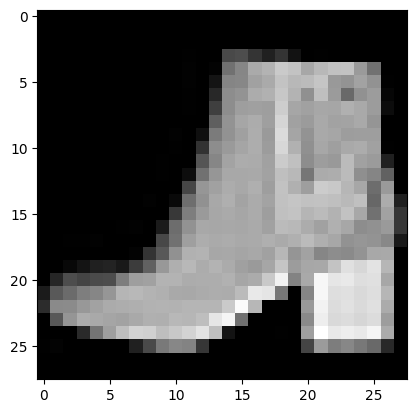

In [32]:
i = np.random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape((28,28)))
plt.imshow(training[i, 1:].reshape((28,28)), cmap='gray')

In [33]:
label = training[i, 0]
label

9.0

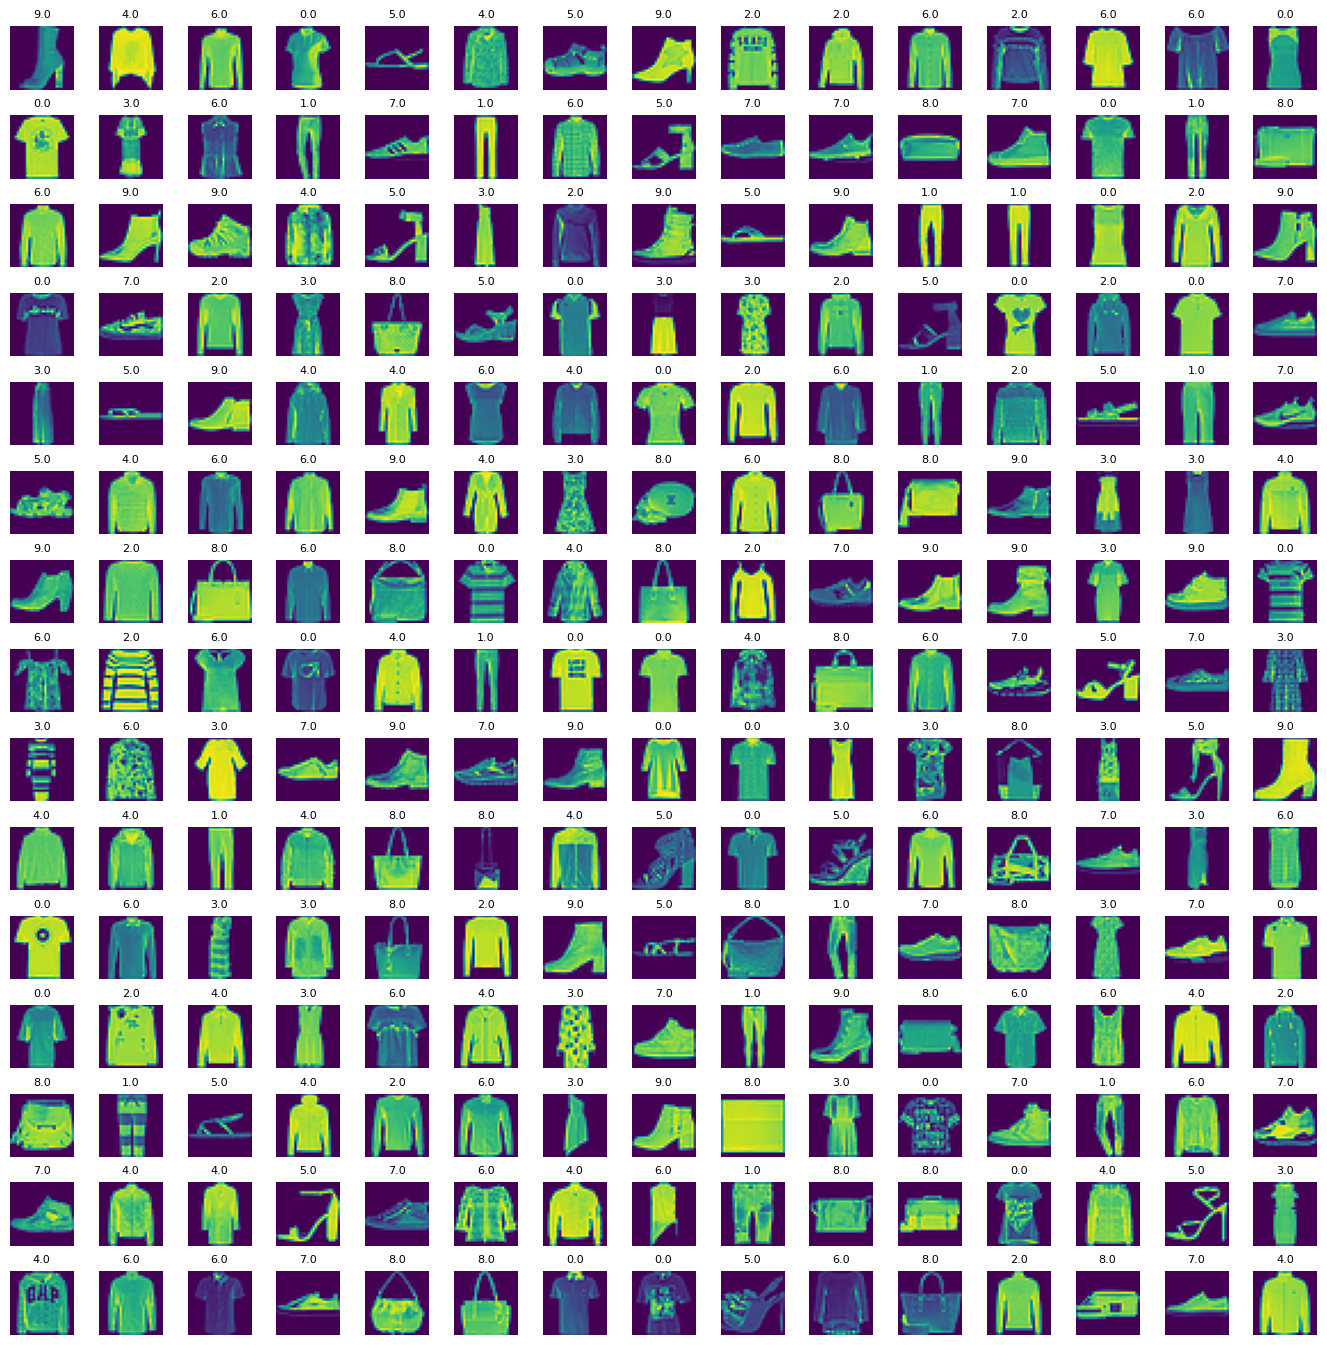

In [37]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))
axes = axes.ravel() # flatenning the axes
n_training = len(training)

for i in np.arange(0, l_grid*w_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index, 1:].reshape((28,28)))
  axes[i].set_title(training[index, 0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

# Data processing

In [38]:
x_train = training[:, 1:] / 255
y_train = training[:, 0]

In [39]:
x_test = testing[:, 1:] / 255
y_test = testing[:, 0]

In [40]:
x_train.shape

(60000, 784)

In [42]:
y_train.shape

(60000,)

In [43]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [45]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

In [46]:
x_train.shape

(60000, 28, 28, 1)

In [47]:
x_test.shape

(10000, 28, 28, 1)

# Model building and training

In [50]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [51]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
epochs = 150
history = cnn.fit(x_train, y_train, epochs = epochs, batch_size=512)

Epoch 1/150
118/118 [==============================] - 57s 467ms/step - loss: 0.8689 - accuracy: 0.6887
Epoch 2/150
118/118 [==============================] - 64s 539ms/step - loss: 0.4906 - accuracy: 0.8220
Epoch 3/150
118/118 [==============================] - 66s 560ms/step - loss: 0.4088 - accuracy: 0.8538
Epoch 4/150
118/118 [==============================] - 61s 520ms/step - loss: 0.3704 - accuracy: 0.8678
Epoch 5/150
118/118 [==============================] - 67s 573ms/step - loss: 0.3415 - accuracy: 0.8778
Epoch 6/150
118/118 [==============================] - 62s 527ms/step - loss: 0.3227 - accuracy: 0.8843
Epoch 7/150
118/118 [==============================] - 75s 635ms/step - loss: 0.3044 - accuracy: 0.8911
Epoch 8/150
118/118 [==============================] - 55s 464ms/step - loss: 0.2942 - accuracy: 0.8937
Epoch 9/150
118/118 [==============================] - 53s 446ms/step - loss: 0.2783 - accuracy: 0.9000
Epoch 10/150
118/118 [==============================] - 52s 435m

# Assessment Model

In [53]:
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9646 - accuracy: 0.9178


In [54]:
evaluation

[0.9645587205886841, 0.9178000092506409]

In [63]:
predicted_classes = cnn.predict(x_test)

313/313 [==============================] - 4s 13ms/step


In [66]:
predicted_classes = np.argmax(predicted_classes, axis=1)

In [67]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [59]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

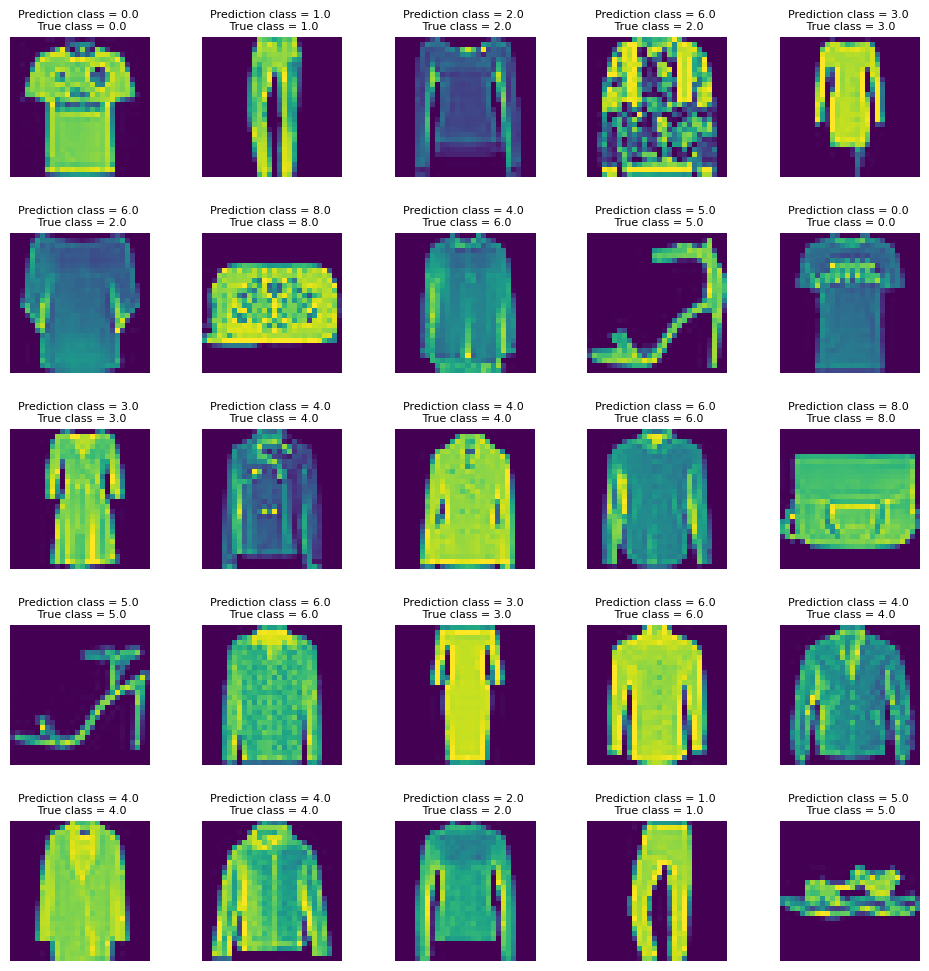

In [68]:
w_grid = 5
l_grid = 5

fig, axes = plt.subplots(l_grid, w_grid, figsize = (12,12))
axes = axes.ravel() # flatenning the axes

for i in np.arange(0, l_grid*w_grid):
  axes[i].imshow(x_test[i].reshape((28,28)))
  axes[i].set_title("Prediction class = {:0.1f} \n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

<Axes: >

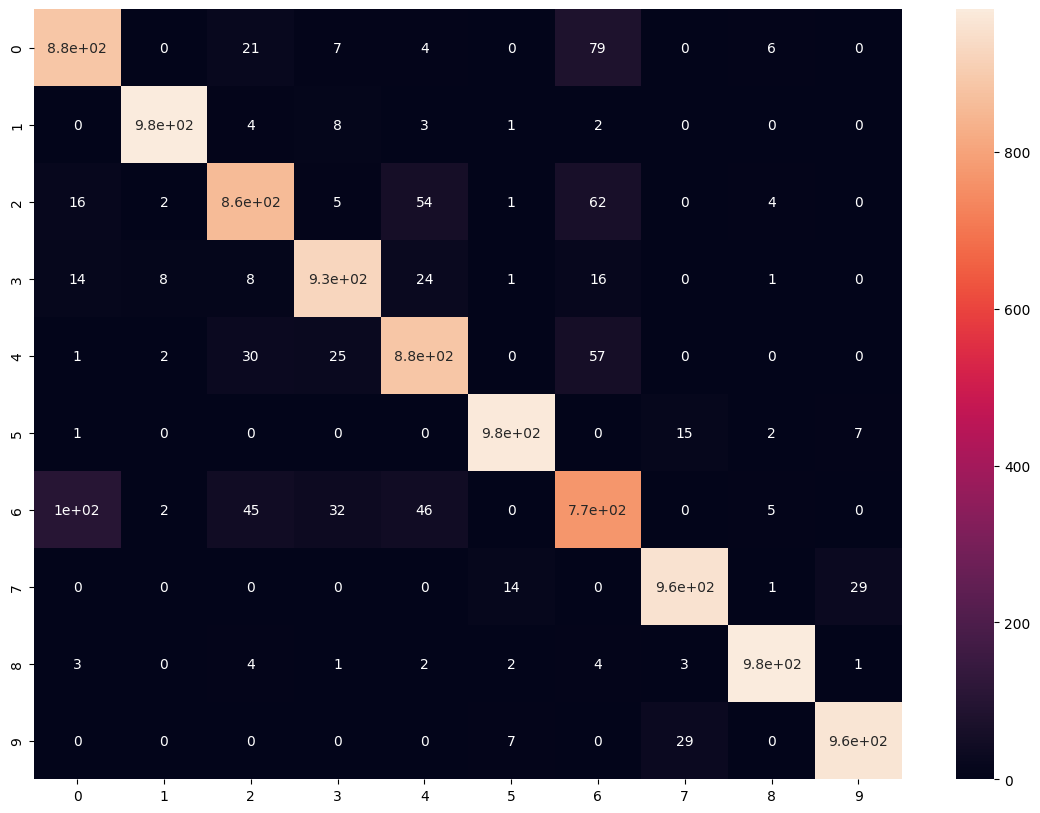

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [70]:
cm

array([[883,   0,  21,   7,   4,   0,  79,   0,   6,   0],
       [  0, 982,   4,   8,   3,   1,   2,   0,   0,   0],
       [ 16,   2, 856,   5,  54,   1,  62,   0,   4,   0],
       [ 14,   8,   8, 928,  24,   1,  16,   0,   1,   0],
       [  1,   2,  30,  25, 885,   0,  57,   0,   0,   0],
       [  1,   0,   0,   0,   0, 975,   0,  15,   2,   7],
       [101,   2,  45,  32,  46,   0, 769,   0,   5,   0],
       [  0,   0,   0,   0,   0,  14,   0, 956,   1,  29],
       [  3,   0,   4,   1,   2,   2,   4,   3, 980,   1],
       [  0,   0,   0,   0,   0,   7,   0,  29,   0, 964]])

In [71]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.88      0.87      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.88      0.86      0.87      1000
     Class 3       0.92      0.93      0.93      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.78      0.77      0.77      1000
     Class 7       0.95      0.96      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

